In [66]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/customer_churn_dataset-training-master.csv')

In [67]:
print("Training Data Shape:", df.shape)

Training Data Shape: (440832, 11)


In [68]:
print("\nFirst few rows of training data:")
print(df.head())


First few rows of training data:
    Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0  30.0       0    39.0             14.0            5.0           18.0   
1  65.0       0    49.0              1.0           10.0            8.0   
2  55.0       0    14.0              4.0            6.0           18.0   
3  58.0       1    38.0             21.0            7.0            7.0   
4  23.0       1    32.0             20.0            5.0            8.0   

   Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  
0                  2                0        932.0              17.0      1  
1                  0                1        557.0               6.0      1  
2                  0                2        185.0               3.0      1  
3                  2                1        396.0              29.0      1  
4                  0                1        617.0              20.0      1  


In [69]:
print("\nMissing values in training data:")
print(df.isnull().sum())


Missing values in training data:
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [70]:
df.shape

(440832, 11)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  int64  
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  int64  
 7   Contract Length    440832 non-null  int64  
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 40.4 MB


In [72]:
df.describe()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,0.567681,31.256336,15.807494,3.604437,12.965722,1.013842,0.998485,631.616223,14.480868,0.567107
std,12.442369,0.495399,17.255727,8.586242,3.070218,8.258063,0.813968,0.895773,240.803001,8.596208,0.495477
min,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,0.000000,16.000000,9.000000,1.000000,6.000000,0.000000,0.000000,480.000000,7.000000,0.000000
50%,39.000000,1.000000,32.000000,16.000000,3.000000,12.000000,1.000000,1.000000,661.000000,14.000000,1.000000
75%,48.000000,1.000000,46.000000,23.000000,6.000000,19.000000,2.000000,2.000000,830.000000,22.000000,1.000000
max,65.000000,1.000000,60.000000,30.000000,10.000000,30.000000,2.000000,2.000000,1000.000000,30.000000,1.000000


In [73]:
print("Training Columns:\n", df.columns.tolist())

Training Columns:
 ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
df.drop(columns=['CustomerID'], inplace=True)

KeyError: "['CustomerID'] not found in axis"

In [76]:
df = df[df['Churn'].notna()].copy()

In [77]:
df['Churn'] = df['Churn'].astype(int)

In [78]:
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [79]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

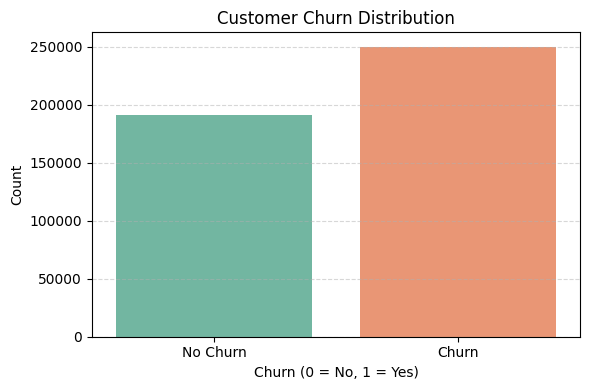

In [82]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf_model = RandomForestClassifier(
    n_estimators=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [89]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

In [90]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

In [91]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

In [93]:
print(f"\nAccuracy:{accuracy:.5f}")
print(f"Precision (PPV):{precision:.5f}")
print(f"Recall (Sensitivity):{recall:.5f}")
print(f"F1 Score:{f1:.5f}")
print(f"ROC AUC:{roc_auc:.5f}")
print(f"Specificity (TNR):{specificity:.5f}")
print(f"False Positive Rate:{fpr:.5f}")
print(f"False Negative Rate:{fnr:.5f}")
print(f"Balanced Accuracy:{balanced_acc:.5f}")
print(f"Matthews Corr Coef:{mcc:.5f}")


Accuracy:0.99968
Precision (PPV):0.99994
Recall (Sensitivity):0.99950
F1 Score:0.99972
ROC AUC:0.99995
Specificity (TNR):0.99992
False Positive Rate:0.00008
False Negative Rate:0.00050
Balanced Accuracy:0.99971
Matthews Corr Coef:0.99935
